In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [119]:
# Read the data from the specified file path 'C:/Users/mohit/project/Order.tsv' into a pandas DataFrame object and use tab as the delimiter
# The resulting DataFrame object is assigned to the variable 'df'


df = pd.read_csv('C:/Users/mohit/project/Order.tsv', sep='\t')




In [120]:
df.head()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship
0,BN-2011-7407039,1-1-13,Ruby Patel,Stockholm,Sweden,North,Home Office,1-5-13,Economy Plus,Stockholm,4
1,AZ-2011-9050313,1-3-13,Summer Hayward,Southport,United Kingdom,North,Consumer,1-7-13,Economy,England,4
2,AZ-2011-6674300,1-4-13,Devin Huddleston,Valence,France,Central,Consumer,1-8-13,Economy,Auvergne-Rhône-Alpes,4
3,BN-2011-2819714,1-4-13,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5
4,AZ-2011-617423,1-5-13,Daniel Burke,Echirolles,France,Central,Home Office,1-7-13,Priority,Auvergne-Rhône-Alpes,2


In [121]:
with open('C:/Users/mohit/project/Order_breakdown.json') as f:
    
    # Read the JSON data from the file object 'f' into a pandas DataFrame object and assign it to the variable 'data'
    data = pd.read_json(f)
    
# Write the contents of the DataFrame object 'data' to a CSV file named 'example.csv' and specify that the CSV file should not include an index column
data.to_csv('example.csv', index=False)

In [122]:
data.head()

,Order ID,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,13.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,8.5,17,-1,2,Office Supplies,Storage


In [123]:
data[data['Order ID']=='AZ-2011-6674300']

,Order ID,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,21,3,Office Supplies,Art


## Data Pre-Processing 


In [124]:
df.shape

(4117, 11)

In [125]:
df[data['Order ID']=='AZ-2011-6674300']

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship
2,AZ-2011-6674300,1-4-13,Devin Huddleston,Valence,France,Central,Consumer,1-8-13,Economy,Auvergne-Rhône-Alpes,4


In [126]:
data.isnull().sum()

Order ID           0
Product Name       0
Discount           0
Actual Discount    0
Sales              0
Profit             0
Quantity           0
Category           0
Sub-Category       0
dtype: int64

In [127]:
df.isnull().sum()

Order ID         0
Order Date       0
Customer Name    0
City             0
Country          0
Region           0
Segment          0
Ship Date        0
Ship Mode        0
State            0
Days to Ship     0
dtype: int64

In [128]:
data.shape

(8047, 9)

In [129]:
df.shape

(4117, 11)

In [130]:
df1=pd.merge(df,data,on='Order ID')

In [131]:
df1.head()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,1-1-13,Ruby Patel,Stockholm,Sweden,North,Home Office,1-5-13,Economy Plus,Stockholm,4,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,1-3-13,Summer Hayward,Southport,United Kingdom,North,Consumer,1-7-13,Economy,England,4,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,1-4-13,Devin Huddleston,Valence,France,Central,Consumer,1-8-13,Economy,Auvergne-Rhône-Alpes,4,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,1-4-13,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5,"Boston Markers, Easy-Erase",0.5,13.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,1-4-13,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5,"Eldon Folders, Single Width",0.5,8.5,17,-1,2,Office Supplies,Storage


In [210]:
df1.isnull().sum()

Order ID               0
Order Date             0
Customer Name          0
City                   0
Country                0
Region                 0
Segment                0
Ship Date              0
Ship Mode              0
State                  0
Days to Ship           0
Product Name           0
Discount               0
Actual_Discount        0
Sales                  0
Profit                 0
Quantity               0
Category               0
Sub-Category           0
Order_month            0
Discount_Percentage    0
dtype: int64

In [132]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8047 entries, 0 to 8046
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order ID         8047 non-null   object 
 1   Order Date       8047 non-null   object 
 2   Customer Name    8047 non-null   object 
 3   City             8047 non-null   object 
 4   Country          8047 non-null   object 
 5   Region           8047 non-null   object 
 6   Segment          8047 non-null   object 
 7   Ship Date        8047 non-null   object 
 8   Ship Mode        8047 non-null   object 
 9   State            8047 non-null   object 
 10  Days to Ship     8047 non-null   int64  
 11  Product Name     8047 non-null   object 
 12  Discount         8047 non-null   float64
 13  Actual Discount  8047 non-null   float64
 14  Sales            8047 non-null   int64  
 15  Profit           8047 non-null   int64  
 16  Quantity         8047 non-null   int64  
 17  Category      

In [133]:
len(df1['City'].unique())

999

In [134]:
len(df1['Order ID'].unique())

4117

In [135]:
len(df1['Country'].unique())
df1['Country'].unique()

array(['Sweden', 'United Kingdom', 'France', 'Italy', 'Austria', 'Spain',
       'Germany', 'Netherlands', 'Denmark', 'Belgium', 'Norway',
       'Portugal', 'Switzerland', 'Ireland', 'Finland'], dtype=object)

In [136]:
df1.shape

(8047, 19)

In [137]:
df1.duplicated().sum()

2

In [138]:
df1.drop_duplicates(inplace=True)

In [139]:
df1.duplicated().sum()

0

In [140]:
df1.describe()

,Days to Ship,Discount,Actual Discount,Sales,Profit,Quantity
count,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000
mean,4.006588,0.110075,29.800485,291.903170,35.202237,3.772281
std,1.740808,0.181787,88.827454,485.258616,178.147747,2.203610
min,0.000000,0.000000,0.000000,3.000000,-3060.000000,1.000000
25%,3.000000,0.000000,0.000000,48.000000,1.000000,2.000000
50%,4.000000,0.000000,0.000000,117.000000,14.000000,3.000000
75%,5.000000,0.100000,22.000000,313.000000,47.000000,5.000000
max,7.000000,0.850000,1700.000000,6517.000000,2476.000000,14.000000


# Exploratory Data Analysis 

## Plot country wise sales

In [141]:
CWS=df1.groupby('Country')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)[0:10]
CWS

,Country,Sales
4,France,609683
5,Germany,488681
14,United Kingdom,420497
7,Italy,252742
11,Spain,249318
0,Austria,79382
8,Netherlands,70313
1,Belgium,42283
12,Sweden,30490
13,Switzerland,24874


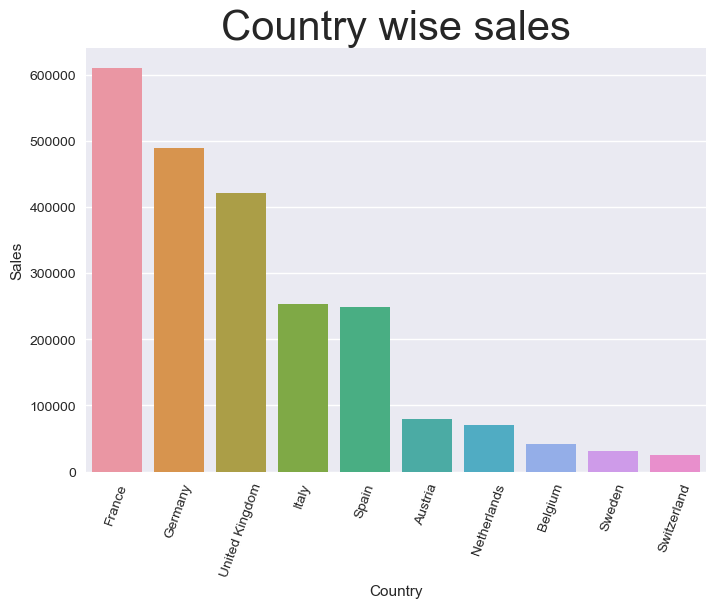

In [142]:
ax=sns.barplot(data=CWS,x='Country',y='Sales')
plt.title('Country wise sales',fontsize=30)

ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
plt.show()

## how sales vary across different product categories

In [143]:
#CatWS=df1.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()
CatWS=df1.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
CatWS

,Category,Sub-Category,Sales
0,Furniture,Bookcases,294396
14,Technology,Copiers,290081
16,Technology,Phones,282559
11,Office Supplies,Storage,272489
4,Office Supplies,Appliances,209900
1,Furniture,Chairs,186698
15,Technology,Machines,182066
13,Technology,Accessories,131309
5,Office Supplies,Art,127147
3,Furniture,Tables,89478


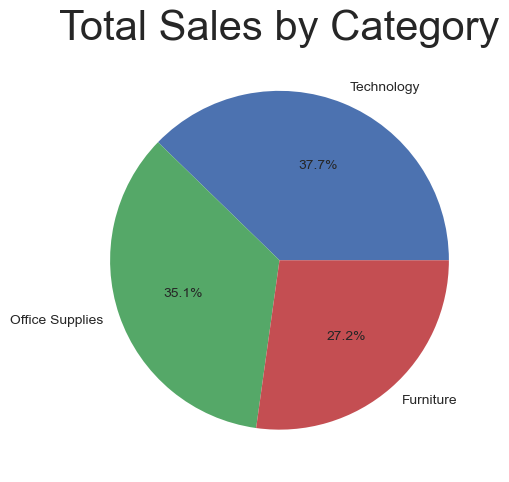

In [144]:
sales_by_category = CatWS.groupby('Category')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)

plt.pie(sales_by_category['Sales'], labels=sales_by_category['Category'], autopct='%1.1f%%')
plt.title('Total Sales by Category', fontsize=30)
plt.show()

Text(0, 0.5, 'Category')

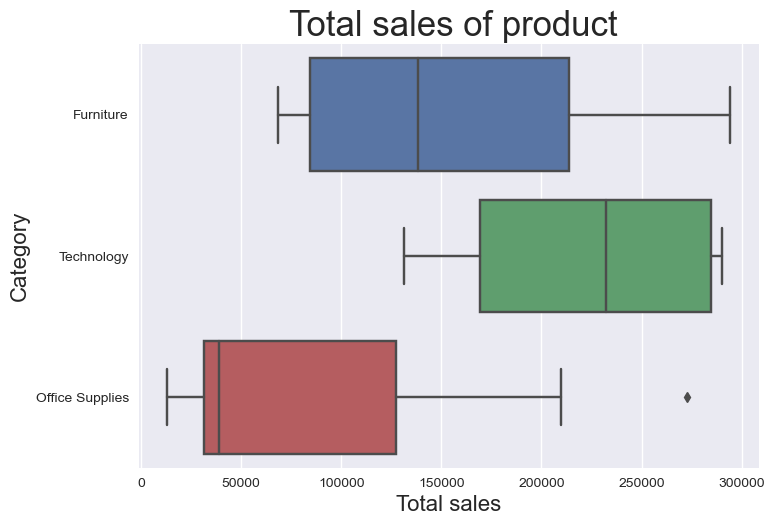

In [145]:
plt.style.use('seaborn')

ax=sns.boxplot(y="Category",x="Sales",data =CatWS)
ax.set_title(label = " Total sales of product", fontsize = 25)
ax.set_xlabel(xlabel = "Total sales", fontsize = 16)
ax.set_ylabel(ylabel = "Category", fontsize = 16)

## Plot Sub-Category wise sales

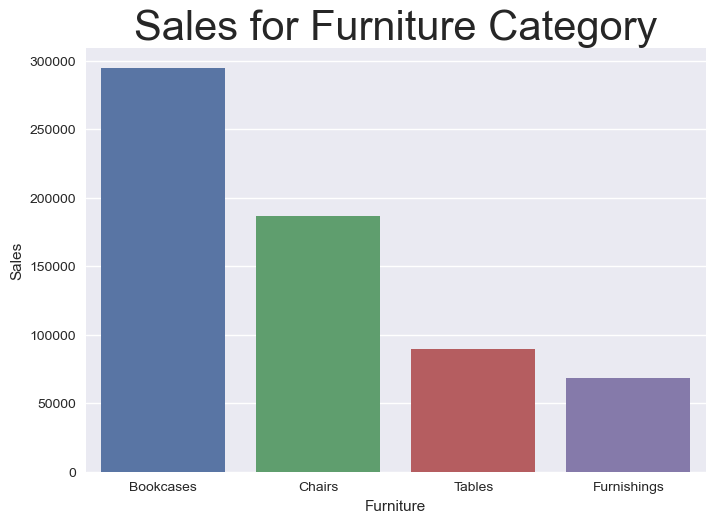

In [146]:

furniture_df = CatWS[CatWS['Category'] == 'Furniture']

sns.barplot(x='Sub-Category', y='Sales', data=furniture_df)
plt.xlabel('Furniture')
plt.ylabel('Sales')
plt.title('Sales for Furniture Category', fontsize=30)
plt.show()

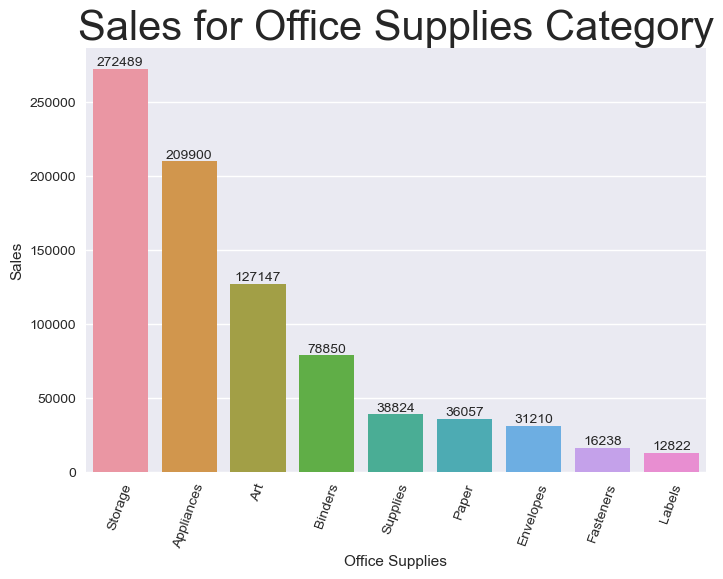

In [147]:

Office_supplies_df = CatWS[CatWS['Category'] == 'Office Supplies']

ax=sns.barplot(x='Sub-Category', y='Sales', data=Office_supplies_df)

for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=70)
plt.xlabel('Office Supplies')
plt.ylabel('Sales')
plt.title('Sales for Office Supplies Category', fontsize=30)
plt.show()

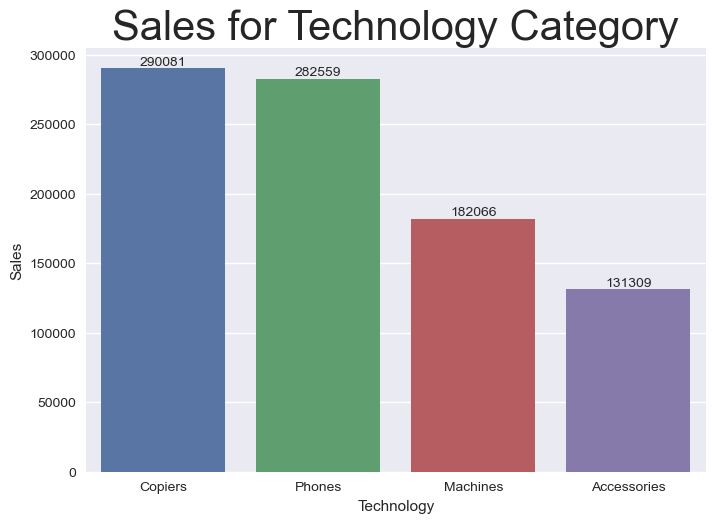

In [148]:
import seaborn as sns

Technology_df = CatWS[CatWS['Category'] == 'Technology']

ax=sns.barplot(x='Sub-Category', y='Sales', data=Technology_df)

for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Technology')
plt.ylabel('Sales')
plt.title('Sales for Technology Category', fontsize=30)
plt.show()

## Plot  sub catogory wise profits 

In [149]:
Cat_Wise_Profit=df1.groupby(['Category','Sub-Category'])['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)


In [150]:
Cat_Wise_Profit.iloc[:10, 1:3]


,Sub-Category,Profit
0,Bookcases,43655
14,Copiers,42775
4,Appliances,37906
16,Phones,27631
13,Accessories,26830
5,Art,23481
11,Storage,21995
1,Chairs,15489
6,Binders,14675
2,Furnishings,11321


Text(0.5, 1.0, 'Sub catogory wise profits ')

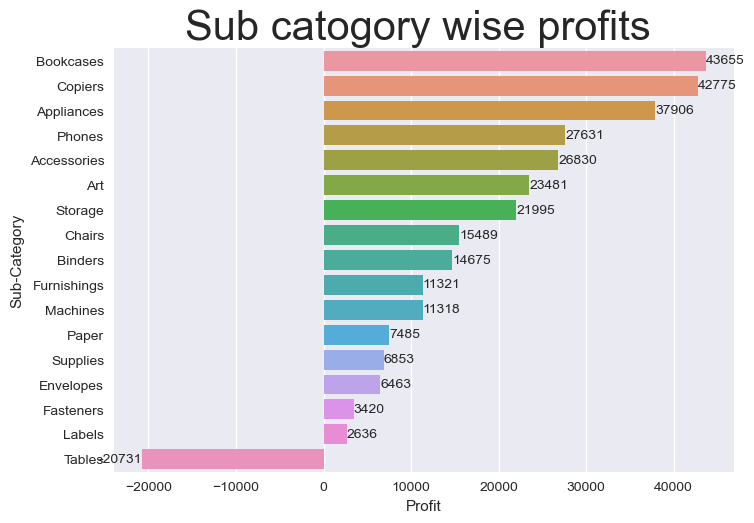

In [191]:
ax=sns.barplot(data=Cat_Wise_Profit,x='Profit',y='Sub-Category')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Sub catogory wise profits ', fontsize=30)


## Plot of Monthly sales 

In [152]:
# convert the datetime object to the desired date format
df1['Order Date']=pd.to_datetime(df1['Order Date'])


In [153]:
df1['Order_month']=df1['Order Date'].dt.month

In [154]:
df1.head()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category,Order_month
0,BN-2011-7407039,2013-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,1-5-13,Economy Plus,Stockholm,4,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper,1
1,AZ-2011-9050313,2013-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,1-7-13,Economy,England,4,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases,1
2,AZ-2011-6674300,2013-01-04,Devin Huddleston,Valence,France,Central,Consumer,1-8-13,Economy,Auvergne-Rhône-Alpes,4,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,21,3,Office Supplies,Art,1
3,BN-2011-2819714,2013-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5,"Boston Markers, Easy-Erase",0.5,13.5,27,-22,2,Office Supplies,Art,1
4,BN-2011-2819714,2013-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5,"Eldon Folders, Single Width",0.5,8.5,17,-1,2,Office Supplies,Storage,1


Text(0.5, 1.0, 'Month wise sales  ')

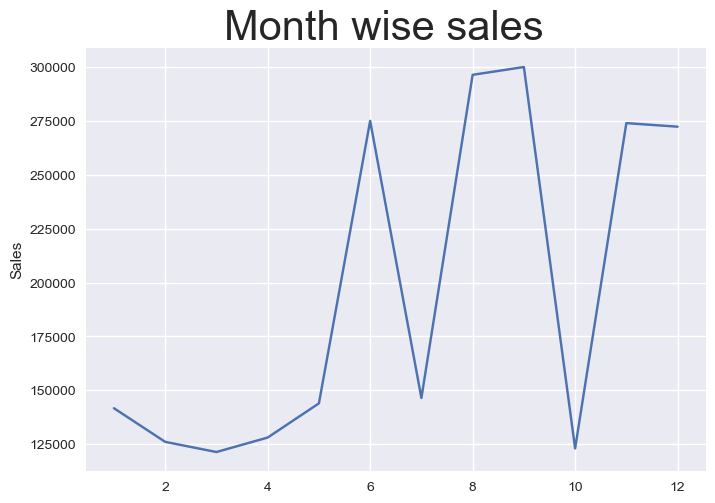

In [195]:
monthlysales = df1.groupby('Order_month')['Sales'].sum().reset_index().sort_values(by='Order_month', ascending=True)
month=range(1,13)
sns.lineplot(data=monthlysales,x=month,y='Sales')
plt.title('Month wise sales  ', fontsize=30)


## Top 10 Highest selling products 

In [201]:
df1.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'City', 'Country', 'Region',
       'Segment', 'Ship Date', 'Ship Mode', 'State', 'Days to Ship',
       'Product Name', 'Discount', 'Actual_Discount', 'Sales', 'Profit',
       'Quantity', 'Category', 'Sub-Category', 'Order_month',
       'Discount_Percentage'],
      dtype='object')

In [209]:
highestselling=df1.groupby('Product Name')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)[0:10]
highestselling

,Product Name,Sales
1223,"Nokia Smart Phone, Full Size",30645
832,"Hamilton Beach Stove, Silver",16890
475,"Cisco Smart Phone, Cordless",14723
1243,"Novimex Executive Leather Armchair, Red",13898
477,"Cisco Smart Phone, with Caller ID",13215
1367,"Rogers File Cart, Single Width",12967
966,"Hoover Stove, Red",12677
149,"Apple Smart Phone, Full Size",12555
1303,"Office Star Executive Leather Armchair, Adjust...",11687
582,"Eldon File Cart, Single Width",11233


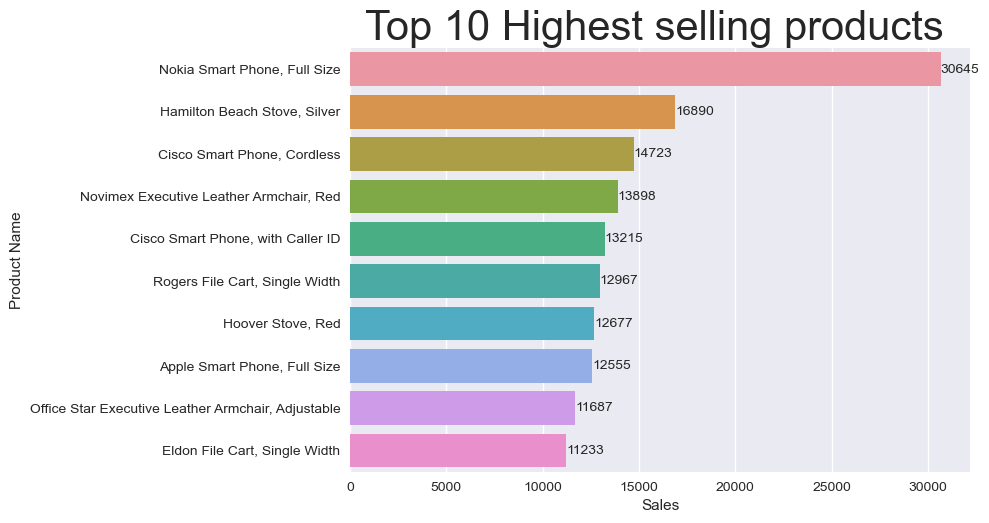

In [204]:
#fig=plt.figure(figsize=(15, 12))
ax=sns.barplot(data=highestselling, x='Sales',y='Product Name')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Top 10 Highest selling products ', fontsize=30)

plt.show()


## how sales vary across different shipping modes. 

In [159]:
Shipmode_w_sales=df1.groupby('Ship Mode')['Sales'].sum().reset_index()

In [160]:
Shipmode_w_sales

,Ship Mode,Sales
0,Economy,1412656
1,Economy Plus,483965
2,Immediate,131314
3,Priority,320426


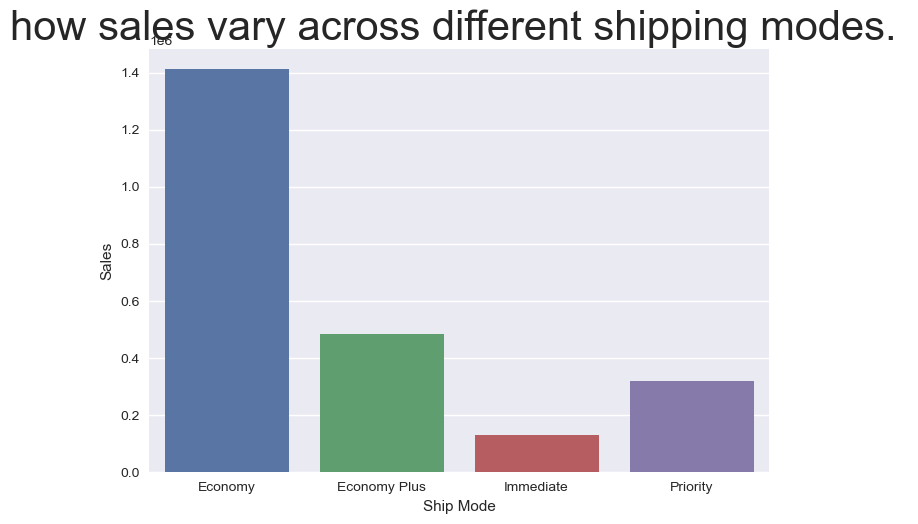

In [208]:
sns.barplot(data=Shipmode_w_sales,x='Ship Mode',y='Sales')
plt.title('how sales vary across different shipping modes. ', fontsize=30)

plt.show()

## Bar plot of sales against segmentation 

In [162]:
Segment_w_sales=df1.groupby(['Segment','Order_month'])['Sales'].sum().reset_index()

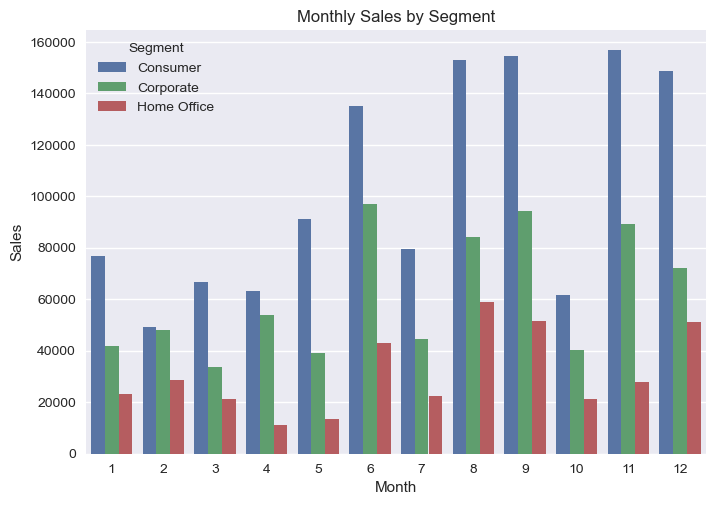

In [163]:
# create a bar plot of the sales by segment and month
ax = sns.barplot(data=Segment_w_sales,x='Order_month',y='Sales',hue='Segment')

# set the plot title and axis labels
ax.set_title('Monthly Sales by Segment')
ax.set_xlabel('Month')
ax.set_ylabel('Sales')

# show the plot
plt.show()

## Relationship between profit and actual discount for each data point

<AxesSubplot:xlabel='Profit', ylabel='Actual Discount'>

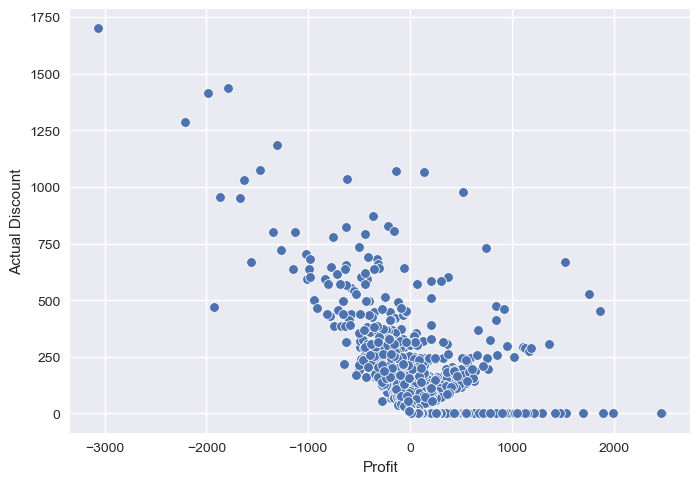

In [164]:
sns.scatterplot(data=df1,x='Profit',y='Actual Discount')

##  Correlation between numerical data 


In [165]:
corr_matrix=df1.corr()
corr_matrix

,Days to Ship,Discount,Actual Discount,Sales,Profit,Quantity,Order_month
Days to Ship,1.000000,0.017547,-0.018932,-0.004393,0.014172,0.001623,0.008272
Discount,0.017547,1.000000,0.426090,-0.026424,-0.351359,0.003633,0.007884
Actual Discount,-0.018932,0.426090,1.000000,0.478885,-0.395889,0.207130,0.003782
Sales,-0.004393,-0.026424,0.478885,1.000000,0.441218,0.353415,-0.001529
Profit,0.014172,-0.351359,-0.395889,0.441218,1.000000,0.098664,0.002311
Quantity,0.001623,0.003633,0.207130,0.353415,0.098664,1.000000,0.006555
Order_month,0.008272,0.007884,0.003782,-0.001529,0.002311,0.006555,1.000000


<AxesSubplot:>

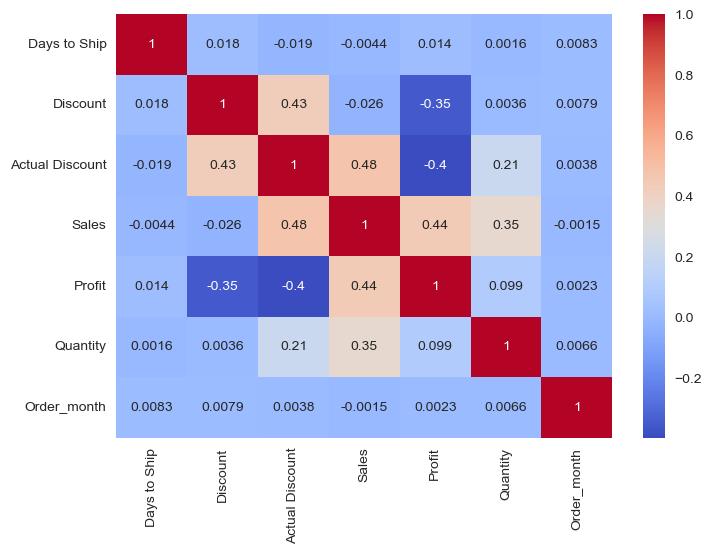

In [166]:
sns.heatmap(corr_matrix,cmap="coolwarm", annot=True)

## Box plot for numerical columns


In [167]:
cat_cols=df1.dtypes[df1.dtypes=='object'].index
num_cols=df1.dtypes[df1.dtypes!='object'].index
print(len(cat_cols)," ",cat_cols)
print(len(num_cols)," ",num_cols)

12   Index(['Order ID', 'Customer Name', 'City', 'Country', 'Region', 'Segment',
       'Ship Date', 'Ship Mode', 'State', 'Product Name', 'Category',
       'Sub-Category'],
      dtype='object')
8   Index(['Order Date', 'Days to Ship', 'Discount', 'Actual Discount', 'Sales',
       'Profit', 'Quantity', 'Order_month'],
      dtype='object')


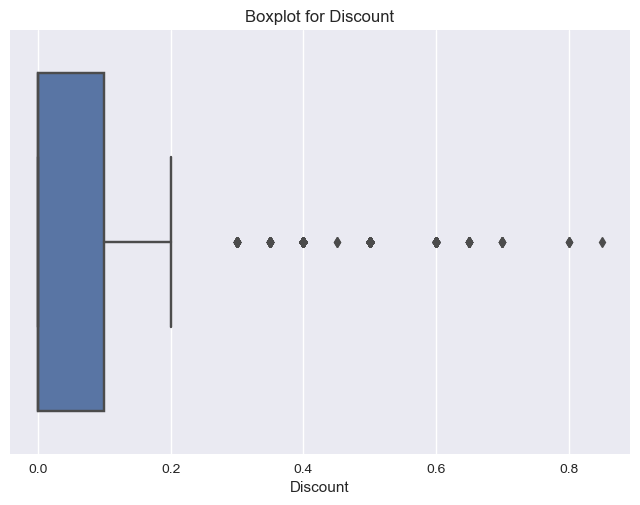

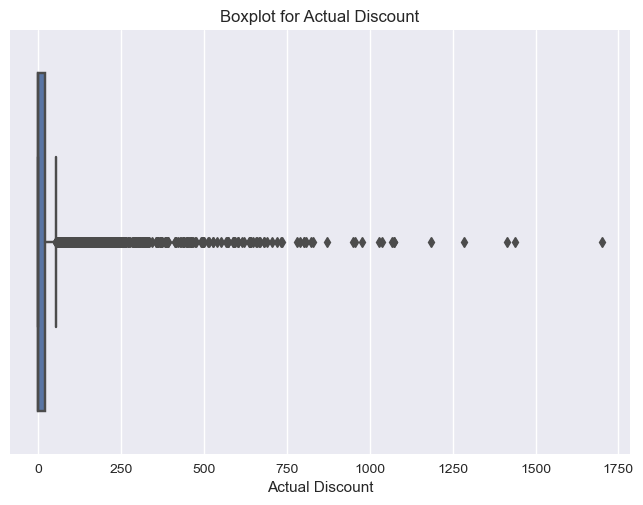

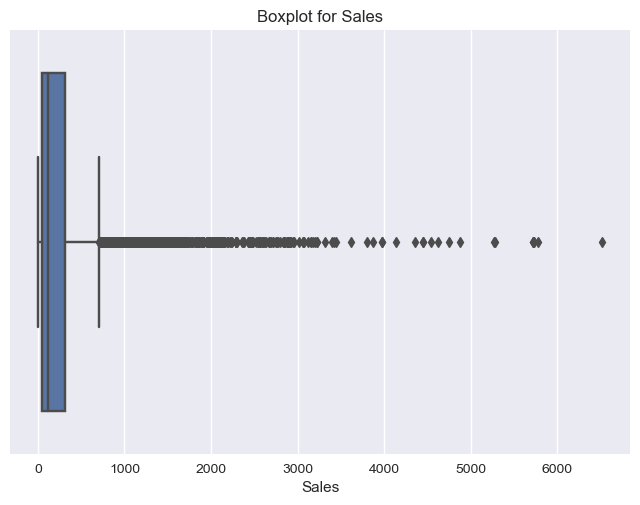

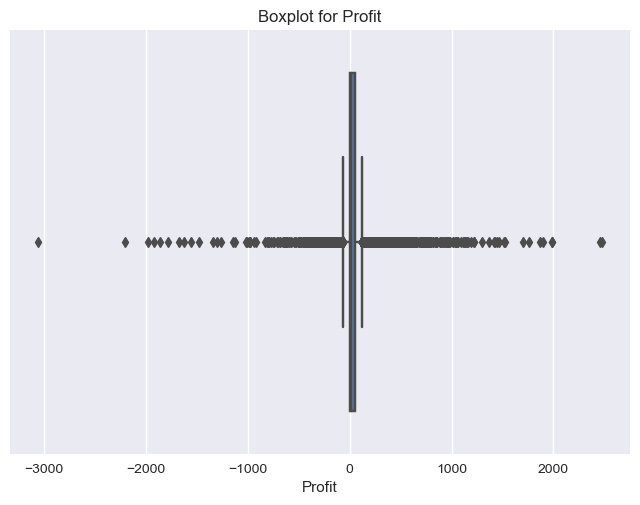

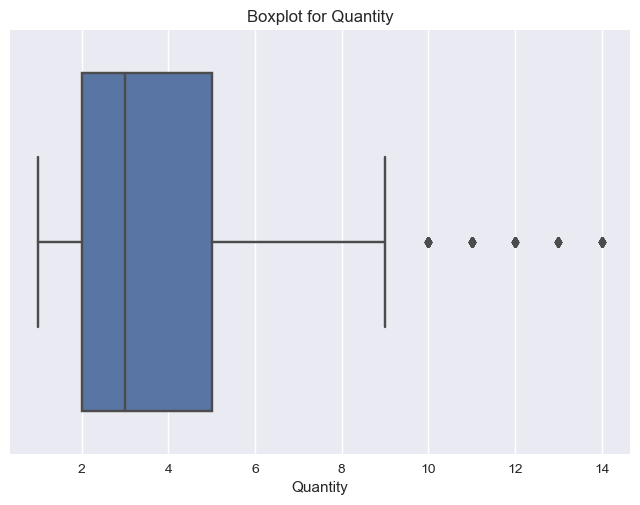

In [168]:
numcols2=df1[['Discount','Actual Discount','Sales','Profit','Quantity']]

for i in numcols2:
    sns.boxplot(x=df1[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [169]:
#Treating the outliers in Discount columns

import numpy as np
median=df1[df1['Discount']>=0.10]['Discount'].median()
df1['Discount']=np.where(df1['Discount']>=0.60,median,df1['Discount'])
median



0.15

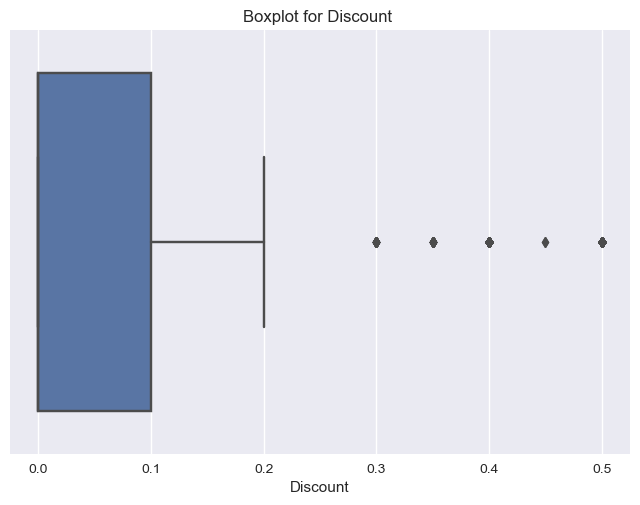

In [170]:
sns.boxplot(x=df1['Discount'])
plt.title('Boxplot for Discount ')
plt.show()

## Selecting Dependent and Independent Features 

In [171]:
df1.rename(columns={'Actual Discount':'Actual_Discount'},inplace=True)

df1['Discount_Percentage']=df1['Discount']*100
print(df1.columns)
df1['Discount_Percentage'] = df1['Discount_Percentage'].astype(int)

Index(['Order ID', 'Order Date', 'Customer Name', 'City', 'Country', 'Region',
       'Segment', 'Ship Date', 'Ship Mode', 'State', 'Days to Ship',
       'Product Name', 'Discount', 'Actual_Discount', 'Sales', 'Profit',
       'Quantity', 'Category', 'Sub-Category', 'Order_month',
       'Discount_Percentage'],
      dtype='object')


In [172]:
x = df1[['Country', 'Region', 'Segment', 'Category', 'Sub-Category','Discount_Percentage', 'Actual_Discount', 'Quantity', 'Order_month']]
y=df1['Sales']




In [173]:
df1['Discount_Percentage'].dtype

dtype('int32')

In [174]:
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(8045, 9)
(8045,)


In [175]:
from sklearn.model_selection import train_test_split

In [176]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=20)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(5631, 9)
(2414, 9)
(5631,)
(2414,)



# Evaluate problem of regression model 

In [177]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [178]:
def eval_model(ytest,ypred):
    mae=mean_absolute_error(ytest,ypred)
    mse=mean_squared_error(ytest,ypred)
    rmse=np.sqrt(mse)
    r2score=r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_SCORE',r2score)
    
def mscore(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_train))

In [179]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [180]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [181]:
print(df1.columns)
print(cat_cols)
print('X train columns',x_train.columns)

Index(['Order ID', 'Order Date', 'Customer Name', 'City', 'Country', 'Region',
       'Segment', 'Ship Date', 'Ship Mode', 'State', 'Days to Ship',
       'Product Name', 'Discount', 'Actual_Discount', 'Sales', 'Profit',
       'Quantity', 'Category', 'Sub-Category', 'Order_month',
       'Discount_Percentage'],
      dtype='object')
Index(['Order ID', 'Customer Name', 'City', 'Country', 'Region', 'Segment',
       'Ship Date', 'Ship Mode', 'State', 'Product Name', 'Category',
       'Sub-Category'],
      dtype='object')
X train columns Index(['Country', 'Region', 'Segment', 'Category', 'Sub-Category',
       'Discount_Percentage', 'Actual_Discount', 'Quantity', 'Order_month'],
      dtype='object')


## 1) Linear Regression

In [182]:
import warnings
warnings.filterwarnings('ignore')

s1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0,1,2,3,4])],
                     remainder='passthrough')

s2=LinearRegression()

pipe_lr=Pipeline([('s1',s1),('s2',s2)])

pipe_lr.fit(x_train,y_train)
ypred_lr=pipe_lr.predict(x_test)
eval_model(y_test,ypred_lr)

MAE 172.77230768408774
MSE 83229.64992909667
RMSE 288.49549377606695
R2_SCORE 0.5342207458564254


## 2)Ridge Regression 


In [183]:
s1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0,1,2,3,4])],
                     remainder='passthrough')

s2=Ridge(alpha=4)

pipe_ridge=Pipeline([('s1',s1),('s2',s2)])

pipe_ridge.fit(x_train,y_train)
ypred_ridge=pipe_ridge.predict(x_test)
eval_model(y_test,ypred_ridge)


MAE 172.31106835618445
MSE 82980.74746573149
RMSE 288.0637906189035
R2_SCORE 0.5356136821938904


## 3)Lasso Regression 


In [184]:
s1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0,1,2,3,4])],
                     remainder='passthrough')

s2=Lasso(alpha=7)

pipe_lasso=Pipeline([('s1',s1),('s2',s2)])

pipe_lasso.fit(x_train,y_train)
ypred_lasso=pipe_lasso.predict(x_test)
eval_model(y_test,ypred_lasso)

MAE 170.0437832768612
MSE 86403.59942583338
RMSE 293.94489181789396
R2_SCORE 0.5164583278895252


## 4) KNN Regression


In [185]:
s1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0,1,2,3,4])],
                     remainder='passthrough')

s2=KNeighborsRegressor(n_neighbors=7)

pipe_knn=Pipeline([('s1',s1),('s2',s2)])

pipe_knn.fit(x_train,y_train)
ypred_knn=pipe_knn.predict(x_test)
eval_model(y_test,ypred_knn)

MAE 102.81565865782933
MSE 67548.35330470216
RMSE 259.90066045453244
R2_SCORE 0.6219782055109706


## 5) DT Regression


In [186]:
s1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0,1,2,3,4])],
                     remainder='passthrough')

s2=DecisionTreeRegressor(criterion='squared_error',max_depth=10,min_samples_split=15)

pipe_dt=Pipeline([('s1',s1),('s2',s2)])

pipe_dt.fit(x_train,y_train)
ypred_dt=pipe_dt.predict(x_test)
eval_model(y_test,ypred_dt)

MAE 103.32815597778406
MSE 56561.010686123926
RMSE 237.82558879591556
R2_SCORE 0.6834668247021006


## 6) RF Regression


In [187]:
s1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0,1,2,3,4])],
                     remainder='passthrough')

s2=RandomForestRegressor(n_estimators=100,criterion='squared_error',max_depth=10,min_samples_split=15)

pipe_rfr=Pipeline([('s1',s1),('s2',s2)])

pipe_rfr.fit(x_train,y_train)
ypred_rfr=pipe_rfr.predict(x_test)
eval_model(y_test,ypred_rfr)

MAE 95.8998030730635
MSE 45316.307840787056
RMSE 212.87627355059337
R2_SCORE 0.7463957125302845


## <i> In conclusion, based on the evaluation metrics, the Random Forest Regression model is the best model for predicting "Sales" on the given dataset. However, it is important to note that the performance of each model may vary depending on the dataset and the problem at hand.The evaluation metrics of  Random Forest Regression model are MAE of 95.90, MSE of 45316.31, RMSE of 212.88, and an R2 score of 0.75.


## Predicting the model on sample data points 

In [188]:
pipe_rfr.predict(pd.DataFrame([['United Kingdom','North','Corporate','Office Supplies','Art',10,10,3,6]],
                 columns=['Country', 'Region', 'Segment', 'Category', 'Sub-Category','Discount_Percentage', 'Actual_Discount', 'Quantity', 'Order_month']))

array([72.84002202])

## Save the model


In [189]:
import pickle


pickle.dump(pipe_rfr,open('rf.pkl','wb'))
pickle.dump(df1,open('dataframe.pkl','wb'))
